# Update run tags

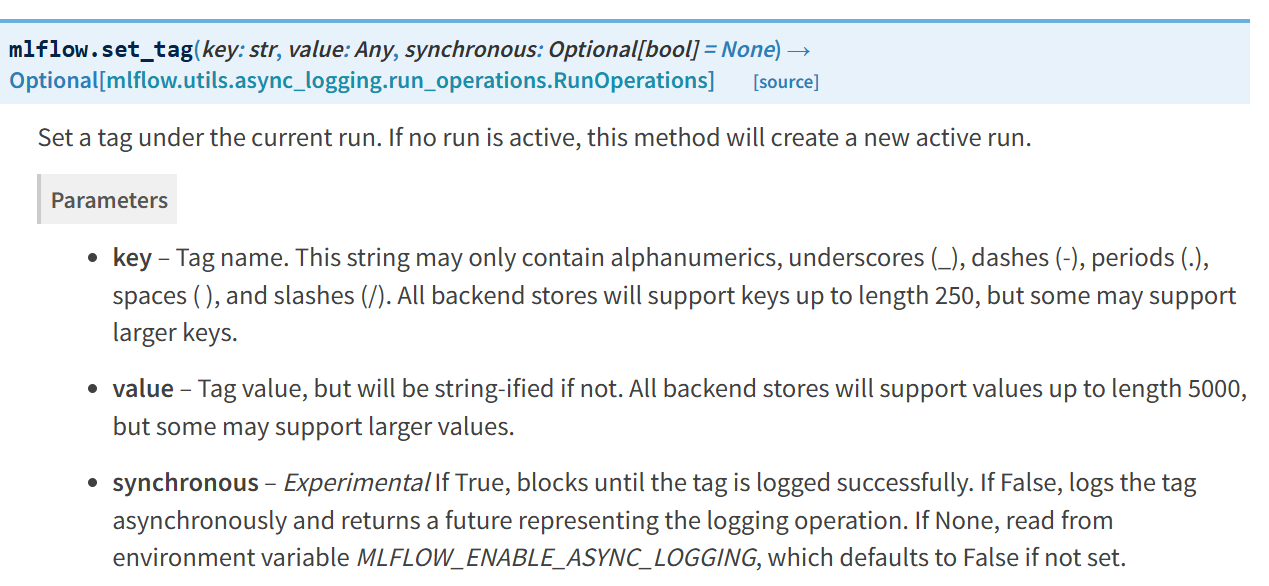

In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
with mlflow.start_run() as run:
    mlflow.set_tag("my-tag", "tag-value")

run = mlflow.last_active_run()
run.data.tags

In [ ]:
# Resume the previous run and update the tag
with mlflow.start_run(run_id=run.info.run_id) as run:
    mlflow.set_tag("my-tag", "tag-value UPDATED")

run = mlflow.last_active_run()
run.data.tags

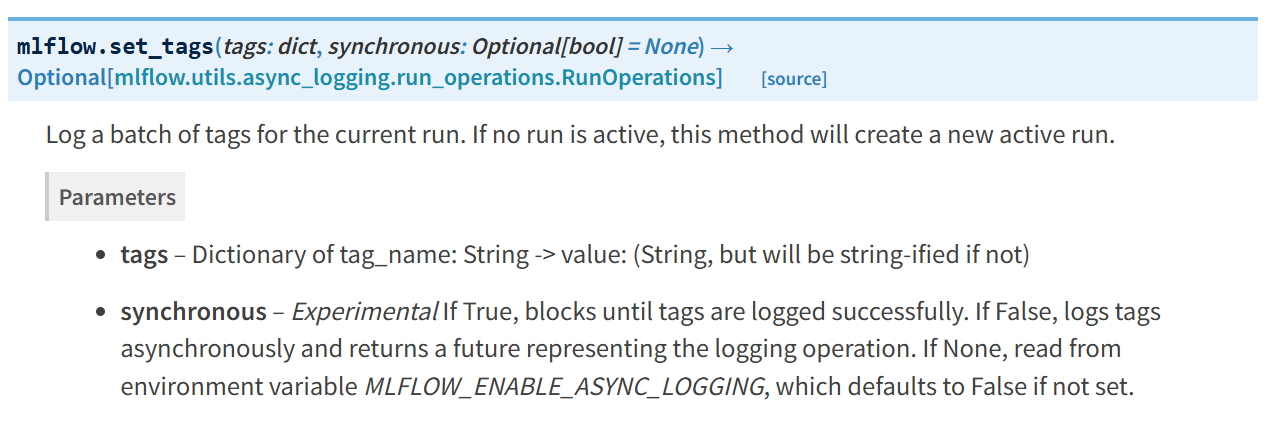

In [ ]:
# Resume the previous run and update the tag
with mlflow.start_run(run.info.run_id) as run:
    mlflow.set_tags({
        "my-tag": "tag-value UPDATED AGAIN",
        "my-tag2": "tag-value2"
    })

run = mlflow.last_active_run()
run.data.tags

# Set Tags using the client

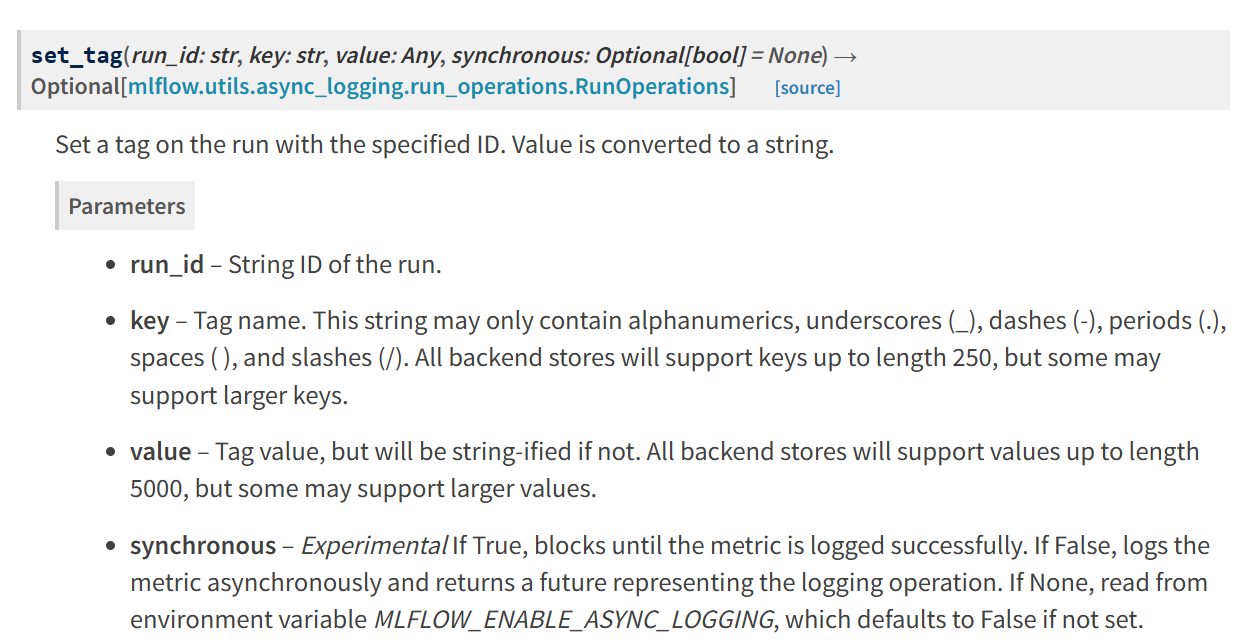

In [ ]:
# get the mlflow client
client = mlflow.MlflowClient()

# Set a tag using the client
client.set_tag(run.info.run_id, "my-tag", "tag-value UPDATED USING CLIENT")
client.set_tag(run.info.run_id, "client-tag", "client-tag-value")

run = mlflow.last_active_run()
run.data.tags


## Providing description by updating tags.

In [ ]:
client = mlflow.MlflowClient()

# Set a tag using the client
client.set_tag(run.info.run_id, "my-tag", "tag-value UPDATED USING CLIENT")
client.set_tag(run.info.run_id, "mlflow.note.content", "This is a description provided using the client.")

run = mlflow.last_active_run()
run.data.tags

In [ ]:
client.set_terminated(run.info.run_id, status="FINISHED")